<a href="https://colab.research.google.com/github/Vijendra07Kulhade/DS_Projects/blob/master/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
prefix='/content/drive/MyDrive/datasets/LaptopPrice'
train_df = pd.read_json(prefix+'/train_dataset.json')
train_df.head(5)

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [ ]:
test_df = pd.read_json(prefix+'/val_dataset.json')
test_df.head(5)

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
3849,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,4,8 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,1128.0,producer warranty,"15"" - 15.9""",3829.0
3904,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2786.5
8356,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,4,16 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,1256.0,producer warranty,"15"" - 15.9""",4269.0
6022,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,8 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.5,intel core i5,new,480.0,producer warranty,"15"" - 15.9""",4239.0
9678,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,3,8 gb,[windows 10 home],hdd,[touchpad],[SD card reader],ddr4,1.6,intel core i5,new,1000.0,producer warranty,"15"" - 15.9""",3799.0


In [ ]:
val_df = pd.read_json(prefix+'/val_dataset.json')
val_df.shape

(1571, 17)

In [ ]:
print(train_df.shape)
print(test_df.shape)

(4711, 17)
(1571, 17)


In [ ]:
!pip install pycaret

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4711 entries, 7233 to 6037
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       4417 non-null   object 
 1   communications          4261 non-null   object 
 2   resolution (px)         4361 non-null   object 
 3   CPU cores               4711 non-null   object 
 4   RAM size                4457 non-null   object 
 5   operating system        4335 non-null   object 
 6   drive type              4454 non-null   object 
 7   input devices           4321 non-null   object 
 8   multimedia              4310 non-null   object 
 9   RAM type                4212 non-null   object 
 10  CPU clock speed (GHz)   4181 non-null   float64
 11  CPU model               4389 non-null   object 
 12  state                   4711 non-null   object 
 13  drive memory size (GB)  4439 non-null   float64
 14  warranty                4711 non-null   ob

In [ ]:
full_df = pd.concat([train_df,test_df,val_df],axis=0)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7853 entries, 7233 to 4277
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       7359 non-null   object 
 1   communications          7079 non-null   object 
 2   resolution (px)         7245 non-null   object 
 3   CPU cores               7853 non-null   object 
 4   RAM size                7413 non-null   object 
 5   operating system        7209 non-null   object 
 6   drive type              7424 non-null   object 
 7   input devices           7173 non-null   object 
 8   multimedia              7150 non-null   object 
 9   RAM type                7000 non-null   object 
 10  CPU clock speed (GHz)   6931 non-null   float64
 11  CPU model               7323 non-null   object 
 12  state                   7853 non-null   object 
 13  drive memory size (GB)  7373 non-null   float64
 14  warranty                7853 non-null   ob

In [ ]:
full_df.head(5)

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lst_cols = ['operating system','input devices','multimedia']
col_lst = ['graphic card type',
            'RAM type','CPU model','state','drive type','warranty']

for col in col_lst:
  print(col)
  le = LabelEncoder()
  full_df[col] = le.fit_transform(full_df[col])


graphic card type
RAM type
CPU model
state
drive type
warranty


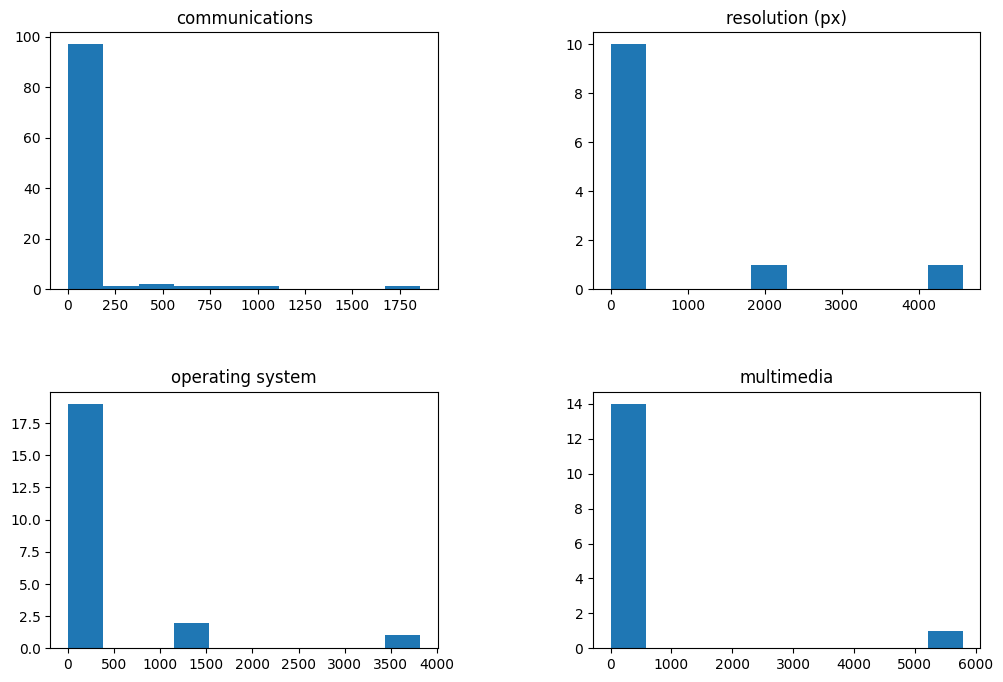

In [ ]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
ax1.hist(full_df['communications'].value_counts())
ax1.set_title('communications')

ax2.hist(full_df['resolution (px)'].value_counts())
ax2.set_title('resolution (px)')

ax3.hist(full_df['operating system'].value_counts())
ax3.set_title('operating system')

ax4.hist(full_df['multimedia'].value_counts())
ax4.set_title('multimedia')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()

In [ ]:
full_df['communications'].apply()
# full_df['communications'].fillna()

['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps']

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_features = {'graphic card type':train_df['graphic card type'].unique().tolist(),
#                   'RAM type':train_df['RAM type'].unique().tolist(),
#                   'CPU model':train_df['CPU model'].unique().tolist(),
#                   'state':train_df['state'].unique().tolist(),
#                   'warranty':train_df['warranty'].unique().tolist()}
# ordinal_features_list = list(ordinal_features.keys())
# o = OrdinalEncoder()
# full_df[ordinal_features_list] = pd.DataFrame(o.fit_transform(full_df[ordinal_features_list]))
# full_df.head(5)

In [ ]:
# categorical_features=['communications','resolution (px)','RAM size','operating system','drive type','input devices','multimedia']

# from pycaret.regression import *
# setup(data=train_df,test_data=test_df,encoding_method='OneHotEncoder',
#       ordinal_features=ordinal_features, target='buynow_price')